In [5]:
# Лабораторна робота №3
# студента гарупи АнД-31
# Пивовара Володимира
# Варіант №9

# На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
# Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.
# Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
# Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.
# Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
# Результати викласти у репозиторії GitHub (папка Lab4).
# Підготуватися до захисту лабораторної роботи (пояснення коду, відповіді на запитання за темою)

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Обираємо необхідні нам класи згідно варіанту (8, 1, 5) для навчальної вибірки
train_data_choosen = []
train_labels_choosen = []
for i in range(len(train_data)):
  if(train_labels[i] == 8 or train_labels[i] == 1 or train_labels[i] == 5):
    train_data_choosen.append(train_data[i])
    train_labels_choosen.append(train_labels[i])

# Обираємо необхідні нам класи згідно варіанту (8, 1, 5) для тестової вибірки
test_data_choosen = []
test_labels_choosen = []
for i in range(len(test_data)):
  if(test_labels[i] == 8 or test_labels[i] == 1 or test_labels[i] == 5):
    test_data_choosen.append(test_data[i])
    test_labels_choosen.append(test_labels[i])

my_train_data = np.array(train_data_choosen)
my_train_labels = np.array(train_labels_choosen)
my_test_data = np.array(test_data_choosen)
my_test_labels = np.array(test_labels_choosen)

# Нормалізація
my_train_data = np.reshape(my_train_data, (len(my_train_labels), 28, 28))
my_test_data = np.reshape(my_test_data, (len(my_test_labels), 28, 28))
my_train_data = my_train_data / 255.0
my_test_data = my_test_data / 255.0

In [6]:
# Навчання нейромережі
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/200))

lr_history = model.fit(my_train_data, my_train_labels, epochs = 30, validation_data = (my_test_data, my_test_labels), callbacks = [lr_scheduler])

print(lr_history)

Epoch 1/30
563/563 [==============================] - 2s 3ms/step - loss: 0.8777 - accuracy: 0.8627 - val_loss: 0.2996 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 2/30
563/563 [==============================] - 2s 3ms/step - loss: 0.1467 - accuracy: 0.9897 - val_loss: 0.0774 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 3/30
563/563 [==============================] - 1s 2ms/step - loss: 0.0540 - accuracy: 0.9916 - val_loss: 0.0495 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 4/30
563/563 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9923 - val_loss: 0.0405 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 5/30
563/563 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9936 - val_loss: 0.0363 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 6/30
563/563 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 0.9945 - val_loss: 0.0451 - val_accuracy: 0.9863 - lr: 0.0011
Epoch 7/30
563/563 [==============================] - 1s 2ms/step - lo

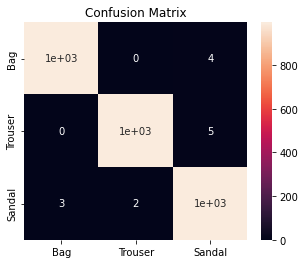

Точність класифікації =  0.9953333333333333


In [7]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Пезультати та побудова Confusion Matrix
prediction = model.predict(my_test_data)
y = []
for data in prediction:
  index_max = np.argmax(data)
  y = np.append(y, index_max)

class_name = ['Bag','Trouser','Sandal']
cm = confusion_matrix(my_test_labels, y)
cm_df = pd.DataFrame(cm, index = class_name, columns = class_name)

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True)
plt.title('Confusion Matrix')
plt.show()

accuracy =  (cm[0][0]+cm[1][1]+cm[2][2]) /(cm.sum())
print('Точність класифікації = ', accuracy)